# Copacabana Runs on Buzzard v2.0

This notebook has some of my runs on the Buzzard v2.0 y3 catalog.

## Import Packages

In [1]:
import sys
sys.path.append('/home/s1/jesteves/git/ccopa/python')

from main import copacabana
from make_input_files.make_photoz_pz import generate_photoz_models
from make_input_files.make_input_datasets import read_hdf5_file_to_dict

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

#### Starting Copa

In [3]:
root = '/data/des61.a/data/johnny/DESY3/projects/CopacabanaRuns/analysis/'
cfg  = root+'config_desy3_rm.yaml'
copa = copacabana(cfg,dataset='des_y3')

master file: 
 /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00259.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00260.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00261.hdf5
/data/des61.a/data/johnny/DESY3/d

## Prepare Files

Given the hdf5 input files, the function *make_input_file()* returns a master file with all the input file, cluster and members

In [10]:
copa.make_input_file()

Running pre_processing_healpix() instead 

cluster columns
{'R200_true': 'R_LAMBDA', 'DEC': 'DEC', 'RA': 'RA', 'redshift': 'Z_LAMBDA', 'tile': 'tile', 'M200_true': 'LAMBDA_CHISQ', 'HALOID': 'MEM_MATCH_ID'}
tile : 277
counts: 2649
Loading Data
infile: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00277.hdf5
ngals : 2.39e+06
Writing Master File
Partial time: 668.14 s 

tile : 278
counts: 2788
Loading Data
infile: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00278.hdf5
ngals : 2.34e+06
Writing Master File
Partial time: 791.22 s 

tile : 279
counts: 448
Loading Data
infile: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00279.hdf5
ngals : 4.42e+05
Writing Master File
Partial time: 46.41 s 



In [21]:
from astropy.table import Table
from astropy.io.fits import getdata

In [22]:
fname = '/data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.fits'

cluster = Table(getdata(fname))

In [23]:
cluster

RA,DEC,Z_LAMBDA,LAMBDA_CHISQ,LAMBDA_CHISQ_E,SCALEVAL,tile
float64,float64,float32,float32,float32,float32,int64
45.213325784218,0.413609510595717,0.26417944,6.9909916,2.1175554,1.1410239,0
44.8820710860101,0.289343366239,0.19364022,42.48932,2.8170002,1.0108446,0
44.8811817440392,0.328352252722895,0.37183228,37.272118,2.8691561,1.0149995,0
44.9093000971721,0.521576665208534,0.20710598,5.511259,1.2947567,1.0212231,0
44.8699544543159,0.663876621631463,0.42131603,6.4570675,1.8470399,1.1422087,0
44.5028833930552,0.568088348356786,0.49044833,8.760569,1.4227391,1.0171106,0
44.578130865961,0.678715300744765,0.16148742,5.694319,1.0716895,1.0313417,0
44.7511202766408,0.79857086337459,0.12700407,8.2418995,1.6355398,1.0405343,0
44.4976936090464,0.72541556122261,0.5852238,5.8011036,1.5600871,0.99900776,0


In [1]:
!h5ls /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00275.hdf5

cluster                  Group
members                  Group


In [6]:
!h5ls /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00275.hdf5/cluster/

axis0                    Dataset {9}
axis1                    Dataset {2031}
block0_items             Dataset {4}
block0_values            Dataset {2031, 4}
block1_items             Dataset {4}
block1_values            Dataset {2031, 4}
block2_items             Dataset {1}
block2_values            Dataset {2031, 1}


The members catalog has all the input galaxies with the input columns
``` GID,CID,redshift,RA,DEC,R,z,zerr,zoffset,zwindow,mag,magerr,dmag,pz0,z_true,TRUE, BKG```

In [8]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5/members/main

Bkg                      Dataset {10230616}
CID                      Dataset {10230616}
DEC                      Dataset {10230616}
GID                      Dataset {10230616}
HALOID                   Dataset {10230616}
Mr                       Dataset {10230616}
R                        Dataset {10230616}
RA                       Dataset {10230616}
True                     Dataset {10230616}
dmag                     Dataset {10230616}
mag                      Dataset {10230616, 4}
magerr                   Dataset {10230616, 4}
mid                      Dataset {10230616}
pz0                      Dataset {10230616}
redshift                 Dataset {10230616}
z                        Dataset {10230616}
z_true                   Dataset {10230616}
zerr                     Dataset {10230616}
zoffset                  Dataset {10230616}


## Create Indices Selection

We want to test different magnitude selections.

### 0.2 $L_{\star}$ Buzzard 

The charcteristic magnitude used in Buzzard is not directly provided. They have in DeRose+19 the luminosity functional form. 
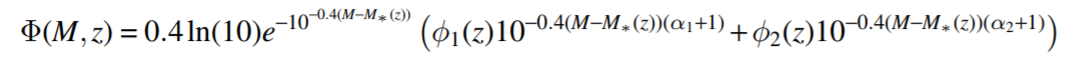

William Black fitted using 5 parameters, his fitted values for m*(z) is in the cell bellow. It's important to mention that 0.2 / 0.4 $L_{\star}$ corresponds to m*(z)+1.75/1.00.

In [23]:
Z1 = [ 2.85703803, 23.35451485]
Z2 = [ -0.13290108,   1.11453393,  -3.74351207,   6.96351527, -10.04310863,  12.60755443,  -7.85820367,   0.92175766]
def char_luminosity(z):
    return np.poly1d(Z1)(np.log(z)) + np.poly1d(Z2)(z)

### 0.2 L$_{\star}$ Rykoff et al. 2014
See the paper: https://iopscience.iop.org/article/10.1088/0004-637X/785/2/104

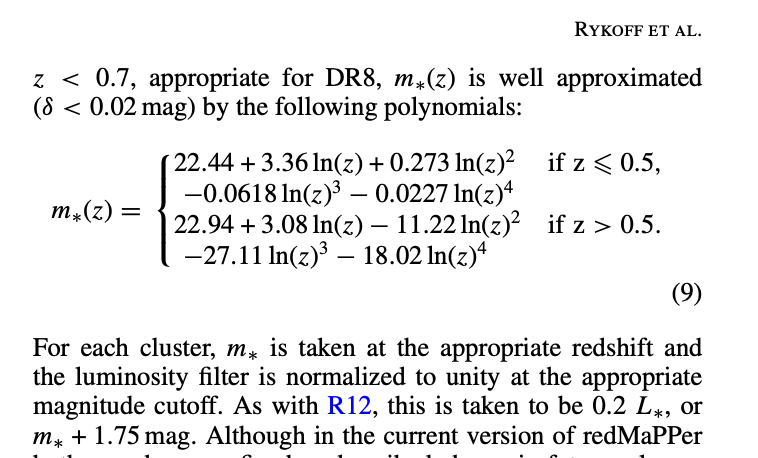

In [24]:
def rm_char_luminosity(z):
    lnz  = np.log(z)
    res0 = 22.44+3.35*lnz+0.273*lnz**2-0.0618*lnz**3-0.0227*lnz**4
    res1 = 22.94+3.08*lnz-11.22*lnz**2-27.11*lnz**3-18.02*lnz**4
    res = np.where(z>0.5,res1,res0)
    return res

### Applying Mag Selection for the whole sample

In [25]:
## Choosing RM Char Luminosity

In [26]:
def apply_02Lstar_cut(fname):
    print('loading data: %s'%fname)
    out = read_hdf5_file_to_dict(fname,cols=['redshift','mag'],path='members/main/')
    mag = out['mag'][:,2]  ## i-band
    zcls= out['redshift'][:]
    
    #print('applying mask')
    #cut = mag <= char_luminosity(zcls)+1.75
    cut = mag <= rm_char_luminosity(zcls)+1.75
    indices = np.where(cut)[0]
    
    print('writing indices selection: %s \n'%('members/indices/02Lstar'))
    write_indices_out(indices,fname,overwrite=False,col='02Lstar')

In [27]:
def apply_dmag_cut(fname):
    print('loading data: %s'%fname)
    out = read_hdf5_file_to_dict(fname,cols=['redshift','mag', 'dmag'],path='members/main/')
    mag = out['dmag'][:]

    #print('applying mask')
    cut = mag <= 0.
    indices = np.where(cut)[0]
    
    print('writing indices selection: %s \n'%('members/indices/dmag_0'))
    write_indices_out(indices,fname,overwrite=False,col='dmag_0')

In [28]:
def write_indices_out(indices,fname,col='02Lstar',overwrite=False):
    fmaster = h5py.File(fname, 'a')
    if 'indices' not in fmaster['members/'].keys():
        fmaster.create_group('members/indices')

    group = fmaster['members/indices']
    
    try:
        group.create_dataset(col,data=indices)
    except:
        if overwrite:
            del group[col]
            group.create_dataset(col,data=indices)
        else:
            print('Error: indices already exists')
    
    fmaster.close()

In [29]:
for fname in copa.master_fname_tile_list:
    apply_02Lstar_cut(fname)
    apply_dmag_cut(fname)

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
writing indices selection: members/indices/02Lstar 

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
writing indices selection: members/indices/dmag_0 

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
writing indices selection: members/indices/02Lstar 

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
writing indices selection: members/indices/dmag_0 

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
writing indices selection: members/indic

In [ ]:
## Example

In [30]:
fname = copa.master_fname_tile_list[8]

In [31]:
out = read_hdf5_file_to_dict(fname,cols=['redshift','mag','dmag'],path='members/main/')
mag = out['mag'][:,2]  ## i-band
dmag = out['dmag'][:]
zcls= out['redshift']

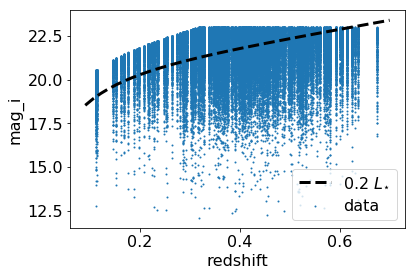

In [32]:
zvec = np.linspace(0.09,0.7,40)
plt.plot(zvec,char_luminosity(zvec)+1.75,'k--',lw=3,label=r'0.2 $L_{\star}$')

plt.scatter(zcls[::50],mag[::50],s=1,label='data')
#plt.scatter(zcls[indices][::50],mag[indices][::50],s=1,label='data')
plt.xlabel('redshift')
plt.ylabel('mag_i')
plt.legend()

In [33]:
cut = mag <= char_luminosity(zcls)+1.75
indices = np.where(cut)[0]

In [34]:
# out = read_hdf5_file_to_dict(fname,cols=['z_true','z','zerr','mag'],path='members/main/')

In [35]:
# mask = out['mag'][:,2]>23
# zdnf = out['z'][:]

In [ ]:
out = read_hdf5_file_to_dict(fname,cols=None,path='members/indices/')

## Create Photo-z Catalogs

### Gaussian Photo-z

In [5]:
generate_photoz_models('gaussian',copa.master_fname_tile_list,0.01,nCores=60)
generate_photoz_models('gaussian',copa.master_fname_tile_list,0.03,nCores=60)
generate_photoz_models('gaussian',copa.master_fname_tile_list,0.05,nCores=60)

Generating photoz catalog: gauss001

Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
Computing pz0
Writing outfile
partial time: 0.24 min

Total time: 0.24 min
Generating photoz catalog: gauss003

Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
Computing pz0
Writing outfile
partial time: 0.23 min

Total time: 0.23 min
Generating photoz catalog: gauss005

Load Infile
infile: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
Computing pz0
Writing outfile
partial time: 0.24 min

Total time: 0.24 min


In [4]:
outfile1=root+'aux_files/modelDNF_correction_z_gold_2_2.txt'
outfile2=root+'aux_files/modelDNF_correction_z_gold_2_2.txt'

generate_photoz_models('bias',copa.master_fname_tile_list,0.03,
                       zwindow_file=outfile2,zerror_file=outfile1,
                       group_name='dnf_model',nCores=60)

Generating photoz catalog: dnf_model

Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
Computing pz0
Writing outfile
partial time: 0.71 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
Computing pz0
Writing outfile
partial time: 0.73 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
Computing pz0
Writing outfile
partial time: 3.33 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5
Computing pz0
Writing outfile
partial time: 7.72 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_

In [5]:
outfile1=None#root+'aux_files/modelDNF_correction_mag_buzzard.txt'
outfile2=root+'aux_files/modelDNF_correction_z_gold_2_2.txt'

generate_photoz_models('bias',copa.master_fname_tile_list,0.03,
                       zwindow_file=outfile2,zerror_file=outfile1,
                       group_name='dnf',nCores=60)

Generating photoz catalog: dnf

Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.70 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.76 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 3.37 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 7.72 min


Load Infile
infile: 

In [ ]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00032.hdf5/members/

Beyond the main catalog, we have the different photo-z catalogs used during the code validation.

## Run BMA

In [ ]:
##### Atention: this cell takes more than 6 hours to run. It only needs to be run one time.

# copa.run_bma_healpix(nCores=60,overwrite=False)

In [ ]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00032.hdf5/members/bma

The output are the quantities provided by the BMA Stellar Mass Estimator, https://github.com/apalmese/BMAStellarMasses. The column ``index`` is the indice from the main catalog.